In [19]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

In [2]:
# download datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 1

## 1(a)
Load the CIFAR-10 dataset with
(x train, y train), (x test, y test) = keras.datasets.cifar10.load data(). Determine and print the following information:

- Number of training and test samples • Size of the images
- Number of color channels
- Number of classes
- Number of samples for each class
- Class label corresponding to each class

In [3]:
print(f'number of training samples, image size in px, image size in px, number of colour channels: {x_train.shape}')

print(f'number of test samples, image size in px, image size in px, number of colour channels: {x_test.shape}')

print(f'number of classes in training sample: {len(np.unique(y_train))}')

print(f'number of classes in test sample: {len(np.unique(y_test))}')

print(f'number of samples for each class in training:\n{pd.value_counts(y_train[:, 0])}')

print(f'number of samples for each class in test:\n{pd.value_counts(y_test[:, 0])}')

number of training samples, image size in px, image size in px, number of colour channels: (50000, 32, 32, 3)
number of test samples, image size in px, image size in px, number of colour channels: (10000, 32, 32, 3)
number of classes in training sample: 10
number of classes in test sample: 10
number of samples for each class in training:
6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64
number of samples for each class in test:
3    1000
8    1000
0    1000
6    1000
1    1000
9    1000
5    1000
7    1000
4    1000
2    1000
dtype: int64


class label corresponding to each class
(cf. https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

In [4]:
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## 1(b)
The images are represented in RGB format, where each pixel can have a value between 0 and 255 for each color channel. Rescale x train, x test, so that all values lie between 0 and 1.

In [5]:
x_train = x_train / 255
x_test = x_test / 255

## 1(c)
**For each class, show five images. Use matplotlib.pyplot.subplots to display them all in one figure. In a second figure, display the class means (as images).**

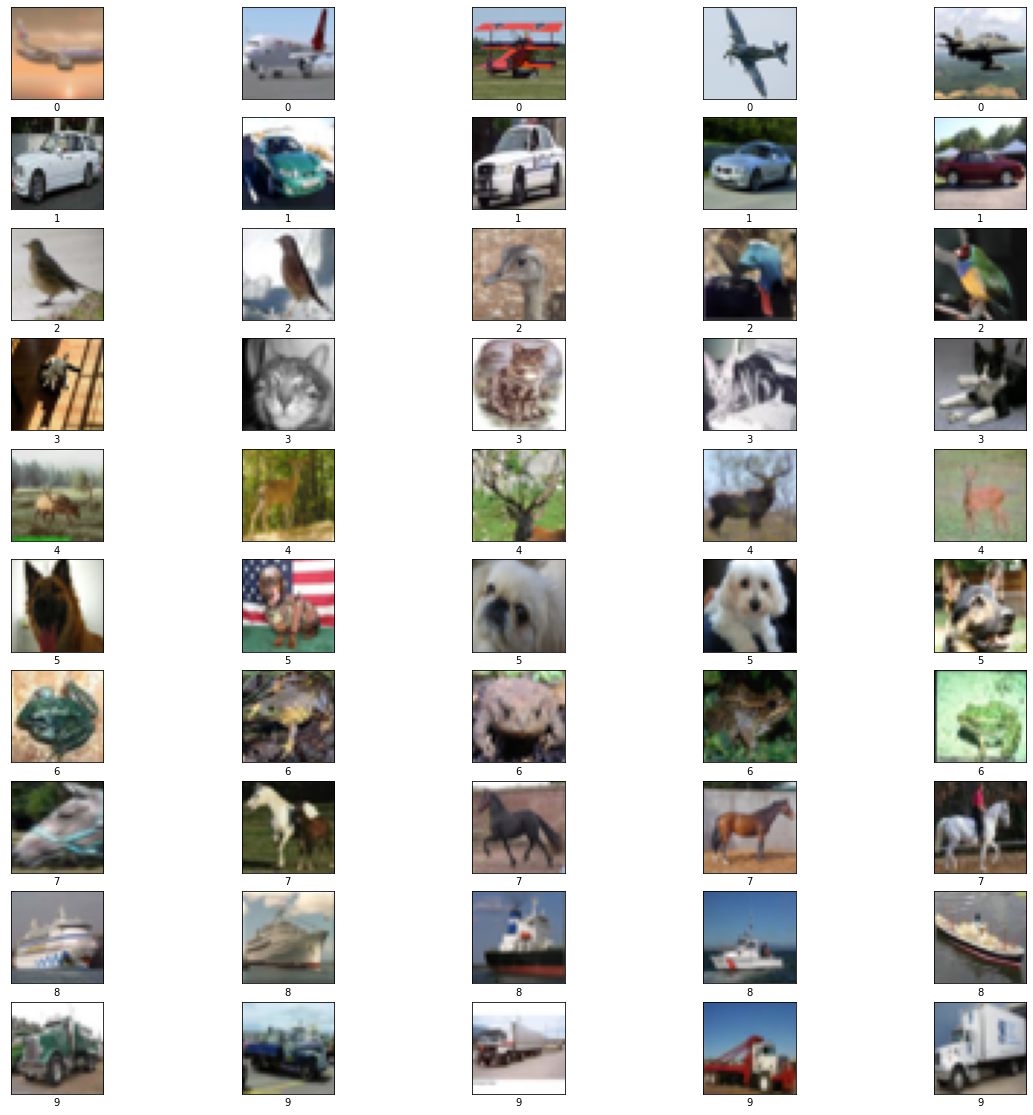

In [6]:
plt.figure(figsize=(20,20))
i = 1
for idx_name, df_group in pd.DataFrame(y_train).groupby(0):
    for idx in df_group.sample(5).index:
      plt.subplot(10,5,i)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x_train[idx])
      plt.xlabel(idx_name)
      i +=1
plt.show()

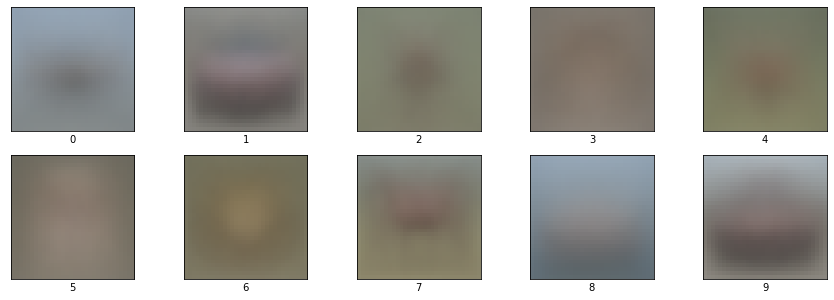

In [7]:
#mean
plt.figure(figsize=(15,5))
i = 1
for idx_name, df_group in pd.DataFrame(y_train).groupby(0):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[df_group.index].mean(axis=0))
    plt.xlabel(idx_name)
    i +=1
plt.show()

## 1(d)
**The chance level is the expected percentage of correct predictions which would be made by randomly choosing a label according to the class probabilities. What is the chance level of this dataset?**

The chance level is 10%

In [8]:
#chance level for each class
display(pd.value_counts(y_train[:,0], normalize=True))
#mean
display(pd.value_counts(y_train[:,0], normalize=True).mean())

6    0.1
9    0.1
4    0.1
1    0.1
2    0.1
7    0.1
8    0.1
3    0.1
5    0.1
0    0.1
dtype: float64

0.09999999999999999

# 2

## 2(a)
**Train a random forest with 1000 trees on the training dataset, using sklearn.ensemble.RandomForestClassifier. Before training, set the random seed us- ing numpy.random.seed(1111).**

**Hint**:
This model requires flat (1-dimensional) input samples and scalar outputs. Use numpy.reshape to change the dimensions of the training and test data.

In [11]:
# train random forest
np.random.seed(1111)
x_train_rf = x_train.reshape(50000,-1)
y_train_rf = y_train.reshape(-1)

x_test_rf = x_test.reshape(10000,-1)
y_test_rf = y_test.reshape(-1)

clf = RandomForestClassifier(n_estimators=1000, verbose=20)

#train model
clf.fit(x_train_rf,y_train_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


building tree 3 of 1000


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.9s remaining:    0.0s


building tree 5 of 1000


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s remaining:    0.0s


building tree 6 of 1000


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.5s remaining:    0.0s


building tree 7 of 1000


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.3s remaining:    0.0s


building tree 8 of 1000


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.1s remaining:    0.0s


building tree 9 of 1000


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.9s remaining:    0.0s


building tree 10 of 1000


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.8s remaining:    0.0s


building tree 11 of 1000


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   20.7s remaining:    0.0s


building tree 12 of 1000


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   22.6s remaining:    0.0s


building tree 13 of 1000


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   24.5s remaining:    0.0s


building tree 14 of 1000


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   26.3s remaining:    0.0s


building tree 15 of 1000


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   28.1s remaining:    0.0s


building tree 16 of 1000


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   30.0s remaining:    0.0s


building tree 17 of 1000


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   31.8s remaining:    0.0s


building tree 18 of 1000


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   33.7s remaining:    0.0s


building tree 19 of 1000


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   35.6s remaining:    0.0s


building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000


building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tre

building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tre

building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 33.5min finished


RandomForestClassifier(n_estimators=1000, verbose=20)

## 2(b)
**With the fitted classifier, predict the labels of the test set.**

In [12]:
# predict the labels
y_pred_test_rf = clf.predict(x_test_rf)
print(y_pred_test_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

[2 8 8 ... 3 5 7]


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.7s finished


## 2(c)
**Compute and print the accuracy of the classifier (percentage of correct predictions).**

Accuracy is 49,56%

In [13]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test_rf)

0.4956

In [14]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rf, target_names=class_labels))

              precision    recall  f1-score   support

    airplane       0.56      0.57      0.57      1000
  automobile       0.56      0.58      0.57      1000
        bird       0.42      0.35      0.38      1000
         cat       0.38      0.29      0.33      1000
        deer       0.44      0.41      0.43      1000
         dog       0.46      0.42      0.44      1000
        frog       0.48      0.62      0.54      1000
       horse       0.53      0.49      0.51      1000
        ship       0.60      0.63      0.61      1000
       truck       0.48      0.59      0.53      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.49      0.50      0.49     10000



## 2(d)
**Compute and display the confusion matrix of the classifier, using sklearn.metrics.confusion_matrix.**

In [15]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test_rf))

[[570  29  54  13  28  17  26  27 168  68]
 [ 24 577  10  32  16  31  38  27  61 184]
 [ 98  42 354  78 127  56 127  59  28  31]
 [ 52  36  56 286  75 183 156  58  20  78]
 [ 51  18 138  46 412  40 152  99  24  20]
 [ 30  26  80 138  68 420  87  91  26  34]
 [ 10  29  73  60  87  44 620  26   6  45]
 [ 47  39  42  44  86  79  52 495  23  93]
 [ 80  80  18  21  18  36  13  22 633  79]
 [ 48 154  16  28  14  13  29  38  71 589]]


### 2(e)
**Which classes are most often confused with each other by this model? Give an explanation, why this may occur.**

Five classes which are most often confused are automobile/truck, cat/dog, airplane/ship, cat/frog and truck/automobile. They are confused because most of them look pretty similiar. Obviously, it is way harder to distinguish between cats and dogs than cats and airplanes.

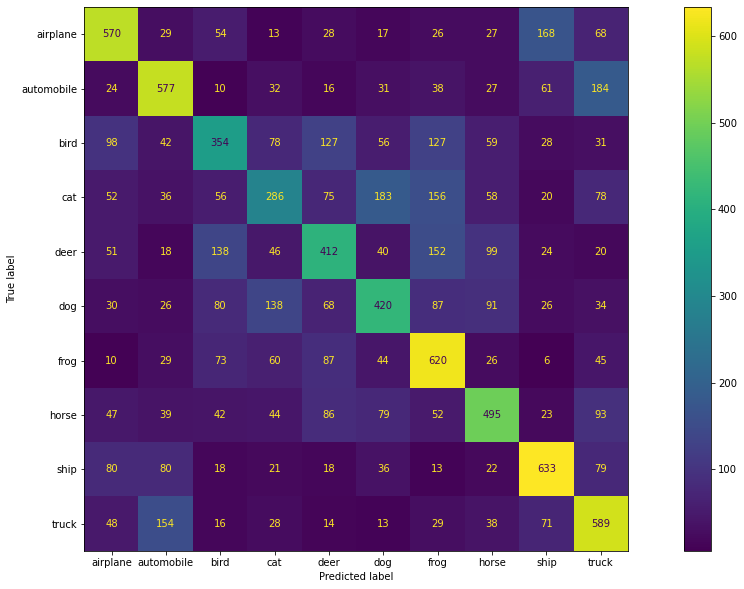

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test_rf),
                               display_labels=class_labels)
disp.plot()
plt.gcf().set_size_inches(20,10)
plt.show()

# 3
**Hints:**

*   All of the following networks need one-hot-encoded output, which you obtain by using tensorflow.keras.utils.to_categorical on y train. 
*   Fully connected models take flattened input, convolutional networks take the input in the original shape of the images. Specify the input shape to the first layer with the input shape argument.
*   All models need an output layer with as many neurons as there are classes, with softmax activation function.
*   The history object h is returned by the fit method of each model. Then access the learning curves with h.history[’accuracy’] and h.history[’val accuracy’].

## 3(a)
**Using keras.models.Sequential as model and keras.layers.Dense as layers, define a fully connected neural network with one hidden layer with 20 neurons with ReLu activation function. Before you start, set the random seeds using numpy.random.seed(2222) and tensorflow.random.set seed(2222).**

In [17]:
# one hot encode target values
y_train_nn = tf.keras.utils.to_categorical(y_train)
y_test_nn = tf.keras.utils.to_categorical(y_test)

In [81]:
# define model
np.random.seed(2222)
tf.random.set_seed(2222)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_rf.shape[1],)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## 3(b)
**Compile the model using binary crossentropy as loss, stochastic gradient descent with learning rate 0.01 as optimizer, and accuracy as additional metric to be measured.**

In [82]:
# compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 3(c)
**Print the summary of the model. How many parameters does the model have in total?**

The model has in total 61.670 parameters 

In [83]:
# print model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 20)                61460     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                210       
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
_________________________________________________________________


## 3(d)
**Fit the model for 30 epochs, using 20% of the training data as validation set. Then plot the learning curves. Does the model overfit? If yes, what do you think is the reason? Would it make sense to train the model for more epochs?**

The model is overfitting because the training accuracy is higher than the testing accuracy. This may be due to a model that is too complex and the NN has has too many filters. Increasing the amount of epochs would not solve the issue.

In [84]:
# fit model
h = model.fit(x_train_rf, y_train_nn,  epochs=30, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 9s 213us/sample - loss: 0.7345 - accuracy: 0.9000 - val_loss: 0.7341 - val_accuracy: 0.9000
Epoch 2/30
40000/40000 [==============================] - 5s 119us/sample - loss: 0.7339 - accuracy: 0.9000 - val_loss: 0.7337 - val_accuracy: 0.9000
Epoch 3/30
40000/40000 [==============================] - 5s 126us/sample - loss: 0.7333 - accuracy: 0.9000 - val_loss: 0.7330 - val_accuracy: 0.9000
Epoch 4/30
40000/40000 [==============================] - 5s 120us/sample - loss: 0.7325 - accuracy: 0.9000 - val_loss: 0.7321 - val_accuracy: 0.9000
Epoch 5/30
40000/40000 [==============================] - 5s 119us/sample - loss: 0.7317 - accuracy: 0.9001 - val_loss: 0.7313 - val_accuracy: 0.8999
Epoch 6/30
40000/40000 [==============================] - 5s 126us/sample - loss: 0.7309 - accuracy: 0.8998 - val_loss: 0.7305 - val_accuracy: 0.8986
Epoch 7/30
40000/40000 [==========================

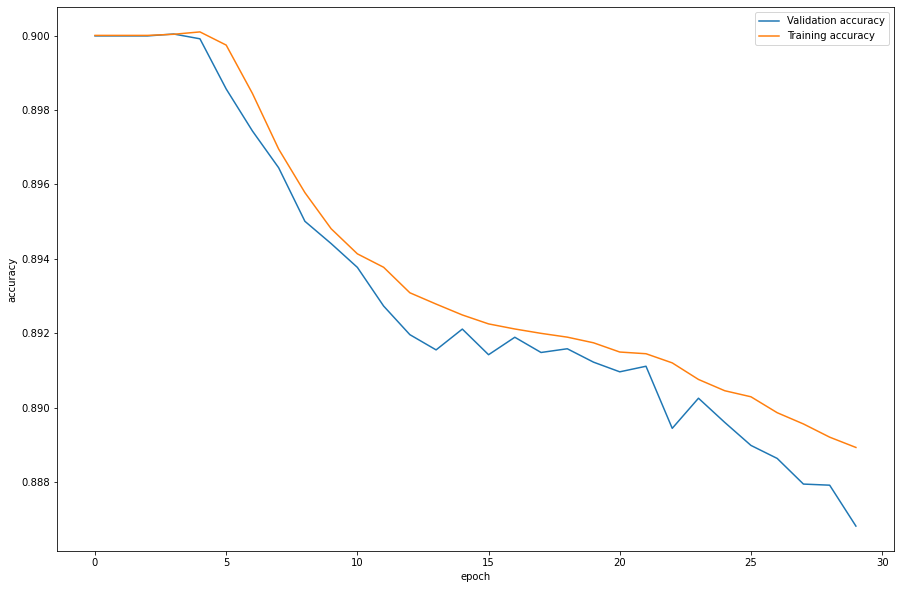

In [85]:
# plot accuracy
plt.figure(figsize=(15,10))
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Validation accuracy", "Training accuracy"])
plt.show()

### 3(e)
**Perform steps (a) - (d) for a fully connected neural network with one hidden layer with 100 neurons. Use the random seed 3333.**

Model 2 has 308.310 Parameter

In [26]:
# one hot encode target values
y_train_nn = tf.keras.utils.to_categorical(y_train)
y_test_nn = tf.keras.utils.to_categorical(y_test)

# set seed
np.random.seed(3333)
tf.random.set_seed(3333)

# layers
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(32, 32)))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# print summary
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# fit model2
h2 = model2.fit(x_train, y_train_nn,  epochs=30, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 6s 162us/sample - loss: 0.7337 - accuracy: 0.8998 - val_loss: 0.7326 - val_accuracy: 0.8999
Epoch 2/30
40000/40000 [==============================] - 5s 119us/sample - loss: 0.7319 - accuracy: 0.8991 - val_loss: 0.7313 - val_accuracy: 0.8987
Epoch 3/30
40000/40000 [==============================] - 5s 119us/sample - loss: 0.7307 - accuracy: 0.8979 - val_loss: 0.7303 - val_accuracy: 0.8967
Epoch 4/30
40000/40000 [==============================] - 5s 123us/sample - loss: 0.7298 - accuracy: 0.8968 - val_loss: 0.7295 - val_accuracy: 0.8961
Epoch 5/30
40000/40000 [==============================] - 5s 126us/sample - loss: 0.7291 - accuracy: 0.8962 - val_loss: 0.7289 - val_accuracy: 0.8952
Epoch 6/30
40000/40000 [==============================] - 5s 123us/sample - loss: 0.7285 - accuracy: 0.8956 - val_loss: 0.7284 - val_accuracy: 0.8943
Epoch 7/30
40000/40000 [==========================

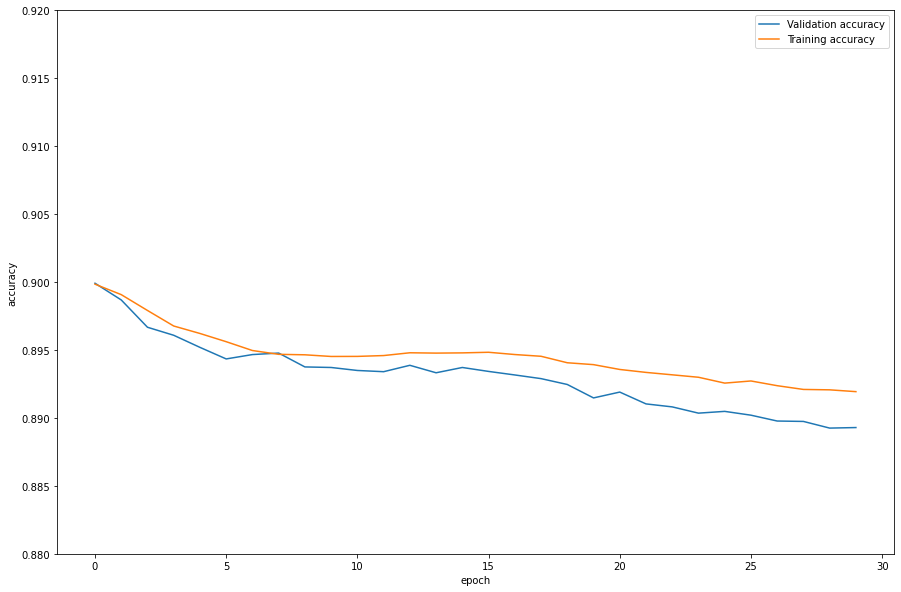

In [28]:
# plot accuracy
plt.figure(figsize=(15,10))
plt.plot(h2.history['val_accuracy'])
plt.plot(h2.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Validation accuracy", "Training accuracy"])
plt.ylim(0.88,0.92)
plt.show()

## 3(f)
**Perform steps (a) - (d) for a convolutional neural network with one convolutional layer (keras.layers.Conv2D) with 64 filters and a kernel size of 3 × 3 and ReLu activation function, followed by a max-pooling layer (keras.layers.MaxPooling2D) with a pool size of 3 × 3. Briefly explain in your own words, what both of these layer types do. Use the random seed 4444.**

**Hint**: You need to add a flattening layer keras.layers.Flatten between the last Conv2D or MaxPooling2D layer and the Dense output layer.

---

The MaxPooling2D layer takes the maximum value from a given pixel array dimension (in our example 3x3 pixel). This is done for each channel of the image. It then moves to the next 3x3 dimension until the entire image is covered.

The Conv2D layer defines a filter for each pixel to get a new value for each pixel. It then applies it to the output if activation is enabled. Usually, those layer are used to enhance lines in images.

source: https://www.tensorflow.org/tutorials/images/cnn

In [29]:
# one hot encode target values
y_train_nn = tf.keras.utils.to_categorical(y_train)
y_test_nn = tf.keras.utils.to_categorical(y_test)

# set seed
np.random.seed(4444)
tf.random.set_seed(4444)

# layers
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(tf.keras.layers.MaxPooling2D((3, 3)))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10))

In [30]:
# compile
model_cnn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# print summary
print(model_cnn.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                409664    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 412,106
Trainable params: 412,106
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# fit model_cnn
h_cnn = model_cnn.fit(x_train, y_train_nn,  epochs=30, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 16s 408us/sample - loss: 0.3334 - accuracy: 0.9000 - val_loss: 0.3182 - val_accuracy: 0.9000
Epoch 2/30
40000/40000 [==============================] - 15s 381us/sample - loss: 0.3115 - accuracy: 0.9000 - val_loss: 0.3050 - val_accuracy: 0.9000
Epoch 3/30
40000/40000 [==============================] - 15s 383us/sample - loss: 0.3000 - accuracy: 0.9000 - val_loss: 0.2958 - val_accuracy: 0.9001
Epoch 4/30
40000/40000 [==============================] - 15s 382us/sample - loss: 0.2928 - accuracy: 0.9002 - val_loss: 0.2913 - val_accuracy: 0.9003
Epoch 5/30
40000/40000 [==============================] - 15s 382us/sample - loss: 0.2882 - accuracy: 0.9003 - val_loss: 0.2870 - val_accuracy: 0.9003
Epoch 6/30
40000/40000 [==============================] - 15s 382us/sample - loss: 0.2842 - accuracy: 0.9005 - val_loss: 0.2826 - val_accuracy: 0.9005
Epoch 7/30
40000/40000 [====================

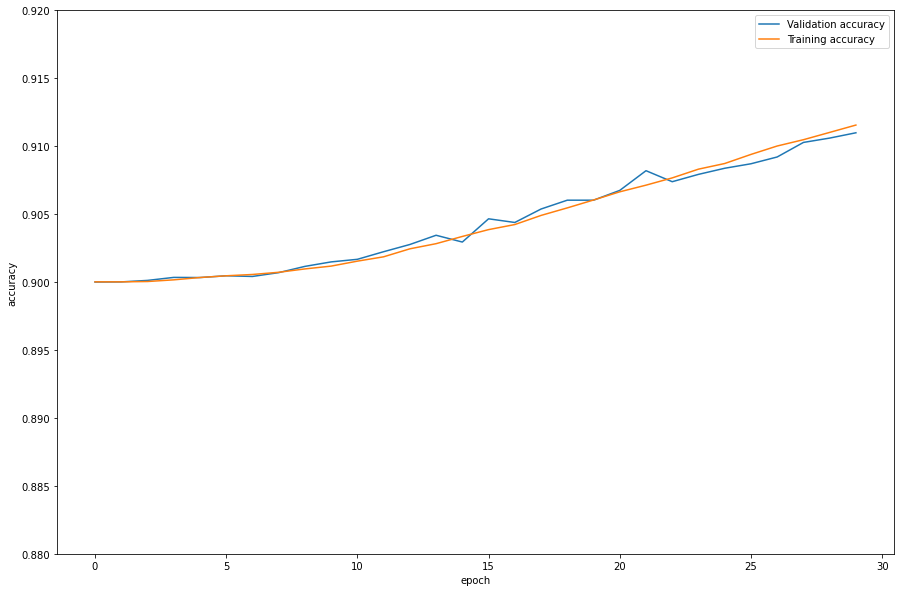

In [32]:
# plot accuracy
plt.figure(figsize=(15,10))
plt.plot(h_cnn.history['val_accuracy'])
plt.plot(h_cnn.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Validation accuracy", "Training accuracy"])
plt.ylim(0.88,0.92)
plt.show()

## 3(g)
Try to create a model that outperforms all of the previous three models by playing around with the model architecture (i.e. number and type of layers, number of neurons, etc.), as well as other parameters. (You may also use layers and parameters other than those discussed here, as well as use existing architectures, so long as you are transparent about your sources.) Use the random seed 5555.
Briefly explain, which different approaches you tried, but only keep one model in your submission.

---
model_cnn2.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model_cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))

--> val_accuracy 0,9087 -> decrease

---
model_cnn2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))
--> val_accuracy 0,9126 -> increase

---
model_cnn2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))

--> val_accuracy 0,9106 -> decrease 

---
epochs=50

--> val_accuracy 0,9201 -> increase




In [46]:
# one hot encode target values
y_train_nn = tf.keras.utils.to_categorical(y_train)
y_test_nn = tf.keras.utils.to_categorical(y_test)

# set seed
np.random.seed(5555)
tf.random.set_seed(5555)

# layers
model_cnn2 = tf.keras.Sequential()
model_cnn2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_cnn2.add(tf.keras.layers.Flatten())
model_cnn2.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn2.add(tf.keras.layers.Dense(10))

# compile
model_cnn2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# print summary
print(model_cnn2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                921664    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 924,106
Trainable params: 924,106
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
# fit model_cnn
h_cnn2 = model_cnn2.fit(x_train, y_train_nn,  epochs=50, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 21s 528us/sample - loss: 0.3267 - accuracy: 0.9000 - val_loss: 0.3116 - val_accuracy: 0.9000
Epoch 2/50
40000/40000 [==============================] - 23s 579us/sample - loss: 0.3033 - accuracy: 0.9000 - val_loss: 0.2974 - val_accuracy: 0.9001
Epoch 3/50
40000/40000 [==============================] - 23s 576us/sample - loss: 0.2920 - accuracy: 0.9001 - val_loss: 0.2887 - val_accuracy: 0.9004
Epoch 4/50
40000/40000 [==============================] - 22s 550us/sample - loss: 0.2846 - accuracy: 0.9004 - val_loss: 0.2829 - val_accuracy: 0.9005
Epoch 5/50
40000/40000 [==============================] - 22s 544us/sample - loss: 0.2789 - accuracy: 0.9005 - val_loss: 0.2773 - val_accuracy: 0.9008
Epoch 6/50
40000/40000 [==============================] - 22s 545us/sample - loss: 0.2738 - accuracy: 0.9008 - val_loss: 0.2732 - val_accuracy: 0.9011
Epoch 7/50
40000/40000 [====================

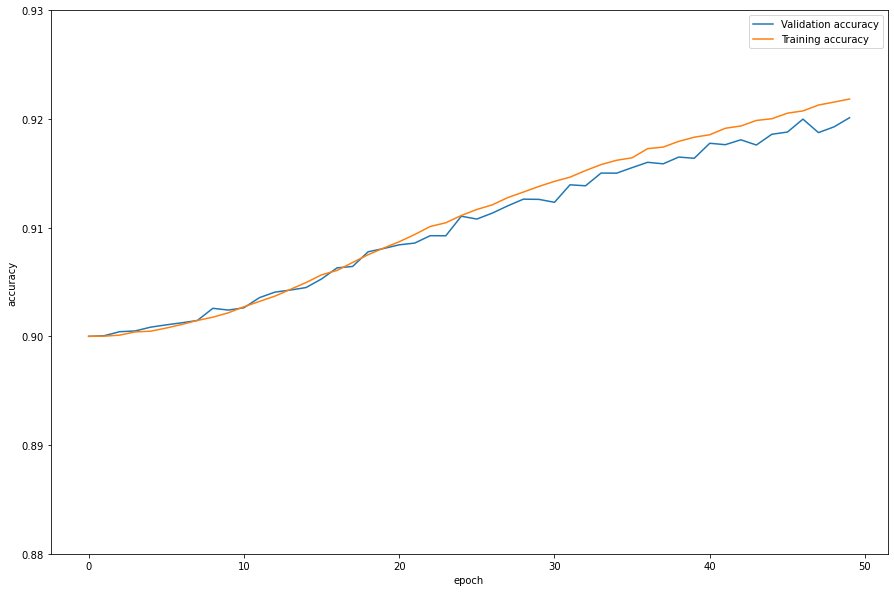

In [87]:
# plot accuracy
plt.figure(figsize=(15,10))
plt.plot(h_cnn2.history['val_accuracy'])
plt.plot(h_cnn2.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Validation accuracy", "Training accuracy"])
plt.ylim(0.88,0.93)
plt.show()

## 3(h)
**Using the best of all previous neural network models, predict the labels of the test set and compute and display accuracy and confusion matrix. Explain why it is important to compare the models with a validation set first, and only then evaluate the chosen model on the test set.**

---

When we play around with the model architecture and paramenters, it is important to use the validation set and not the test set. If we tune our model with the test and validation set, we no longer have a dataset to review our model and cannot check if our model works well with unseen data.

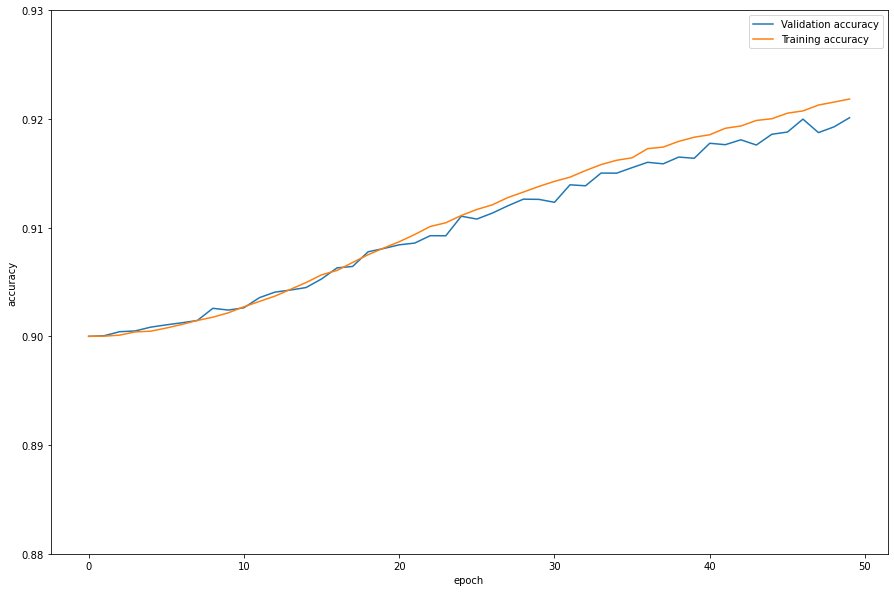

10000/1 - 2s - loss: 0.1979 - accuracy: 0.9199
0.9199498


In [57]:
# using the best model from (g) -> epochs=50
# plot accuracy
plt.figure(figsize=(15,10))
plt.plot(h_cnn2.history['val_accuracy'])
plt.plot(h_cnn2.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Validation accuracy", "Training accuracy"])
plt.ylim(0.88,0.93)
plt.show()

test_loss, test_acc = model_cnn2.evaluate(x_test, y_test_nn, verbose=2)
print(test_acc)


In [94]:
# predict the labels
y_predictions = model_cnn2.predict(x_test)
print(y_predictions.argmax(axis=1))

[3 8 8 ... 5 1 7]


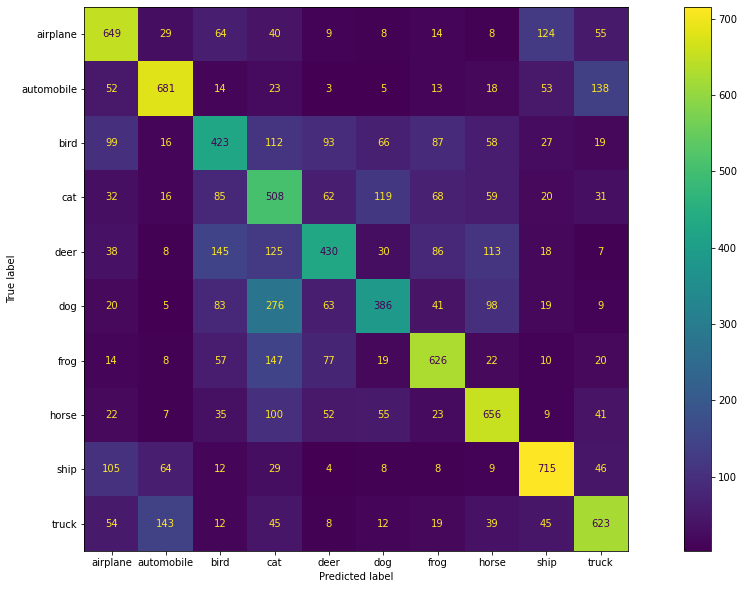

In [95]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
CF_cnn2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predictions.argmax(axis=1)),
                               display_labels=class_labels)
CF_cnn2.plot()
plt.gcf().set_size_inches(20,10)
plt.show()

In [96]:
# confusion matrix
confusion_matrix(y_test, y_predictions.argmax(axis=1))

array([[649,  29,  64,  40,   9,   8,  14,   8, 124,  55],
       [ 52, 681,  14,  23,   3,   5,  13,  18,  53, 138],
       [ 99,  16, 423, 112,  93,  66,  87,  58,  27,  19],
       [ 32,  16,  85, 508,  62, 119,  68,  59,  20,  31],
       [ 38,   8, 145, 125, 430,  30,  86, 113,  18,   7],
       [ 20,   5,  83, 276,  63, 386,  41,  98,  19,   9],
       [ 14,   8,  57, 147,  77,  19, 626,  22,  10,  20],
       [ 22,   7,  35, 100,  52,  55,  23, 656,   9,  41],
       [105,  64,  12,  29,   4,   8,   8,   9, 715,  46],
       [ 54, 143,  12,  45,   8,  12,  19,  39,  45, 623]])

In [97]:
# classification report
print(classification_report(y_test, y_predictions.argmax(axis=1), target_names=class_labels))

              precision    recall  f1-score   support

    airplane       0.60      0.65      0.62      1000
  automobile       0.70      0.68      0.69      1000
        bird       0.45      0.42      0.44      1000
         cat       0.36      0.51      0.42      1000
        deer       0.54      0.43      0.48      1000
         dog       0.55      0.39      0.45      1000
        frog       0.64      0.63      0.63      1000
       horse       0.61      0.66      0.63      1000
        ship       0.69      0.71      0.70      1000
       truck       0.63      0.62      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000

